In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_csv('covid19.csv')

In [3]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [6]:
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.309579,-0.162856
Long_,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.345441,0.325817
Recovered,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.252155,0.302197
Active,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,-0.092705,-0.172665
Incident_Rate,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.620621,0.258029
People_Tested,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.230753,0.356618
People_Hospitalized,0.065030,0.280909,0.989936,0.992313,0.962082,0.976456,0.013433,0.725370,0.906210,1.000000,0.509658,0.013433,0.331753,0.377586


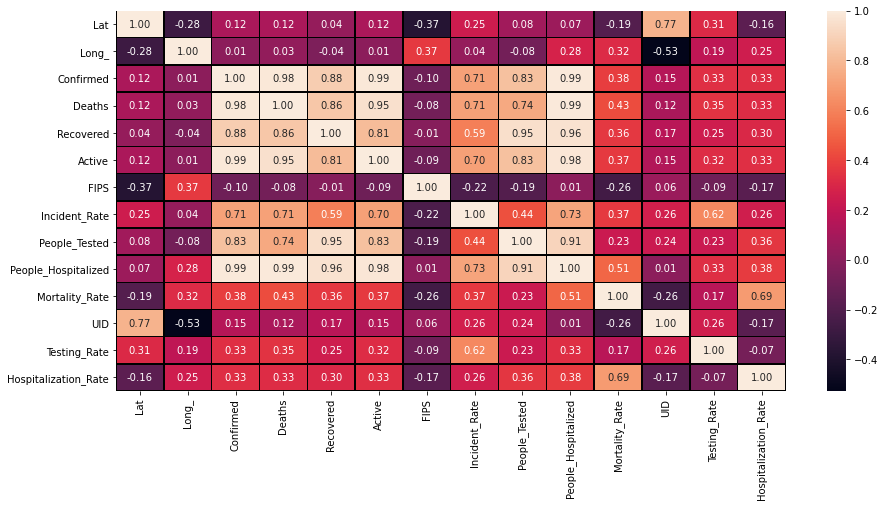

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor='black',fmt='.2f')

In [8]:
df.drop(columns=['Lat','Long_','FIPS','People_Hospitalized','UID'], inplace= True)

In [9]:
df.shape

(58, 13)

In [10]:
df=df.fillna(method='ffill')

In [11]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [12]:
le=LabelEncoder()

list1=['Province_State','Country_Region','Last_Update','ISO3']   #for labeling multiple columns
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [13]:
df

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,13052,522,NaN,12530.0,266.194321,164450.0,3.999387,4,3353.942386,11.438860
1,1,0,0,401,10,352.0,39.0,54.815493,37045.0,2.493766,4,5063.940017,11.438860
2,2,0,0,0,0,352.0,0.0,0.000000,124.0,2.493766,0,222.857246,11.438860
3,3,0,0,14906,747,3773.0,10386.0,204.788838,165435.0,5.011405,4,2272.859351,12.022005
4,4,0,0,5003,107,3852.0,1044.0,165.782801,96258.0,2.138717,4,3189.670370,10.693584
5,5,0,0,85997,3497,3852.0,82500.0,217.646575,1380120.0,4.066421,4,3492.893832,10.693584
6,6,0,0,22797,1299,3478.0,18020.0,395.868121,131837.0,5.698118,4,2289.339188,17.348774
7,7,0,0,39017,3529,6264.0,29224.0,1094.357902,190718.0,9.044775,4,5349.302875,28.054438
8,8,0,0,8194,310,3965.0,3919.0,841.476990,45412.0,3.783256,4,4663.552976,28.054438
9,9,0,0,49,0,3965.0,49.0,841.476990,45412.0,0.000000,4,4663.552976,28.054438


In [14]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered               1
Active                  0
Incident_Rate           0
People_Tested           0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [15]:
df = df.dropna(subset =['Recovered'])

In [16]:
df.dtypes

Province_State            int32
Country_Region            int32
Last_Update               int32
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
Mortality_Rate          float64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE76972880>,
      dtype=object)

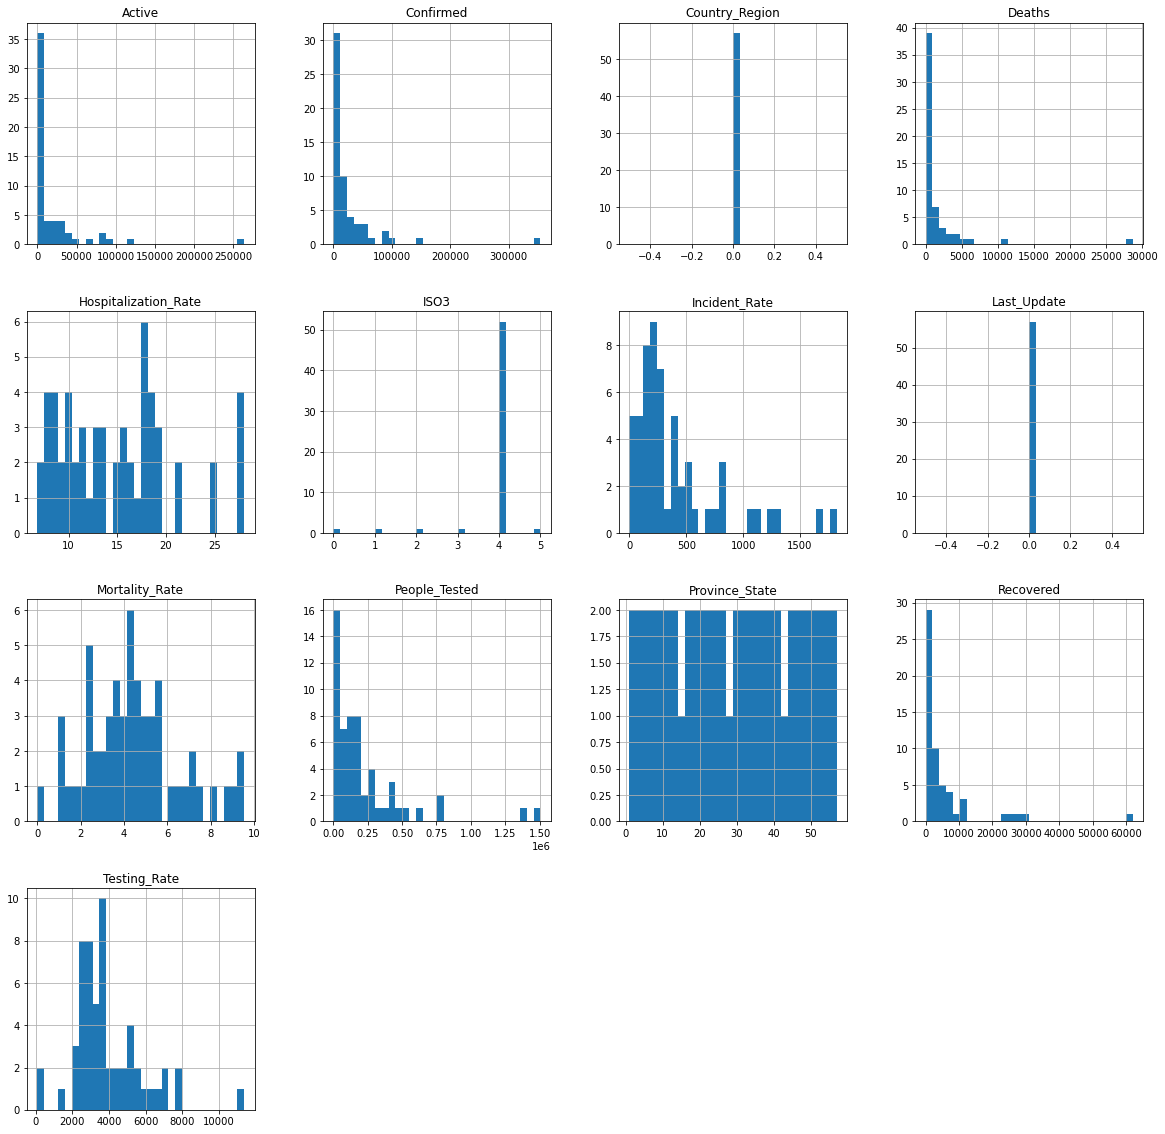

In [17]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

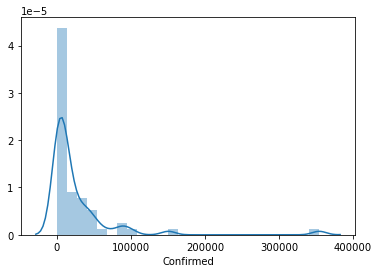

In [18]:
import seaborn as sns
sns.distplot(df['Confirmed'])

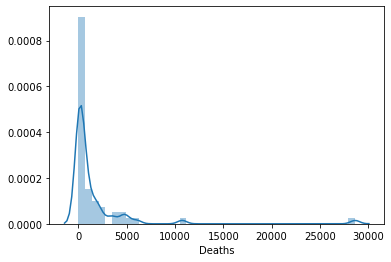

In [19]:
sns.distplot(df['Deaths'])

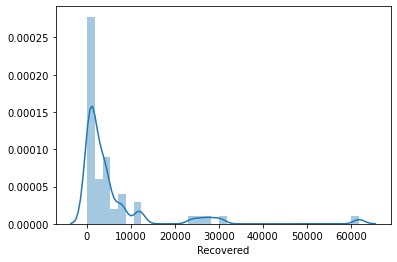

In [20]:
sns.distplot(df['Recovered'])

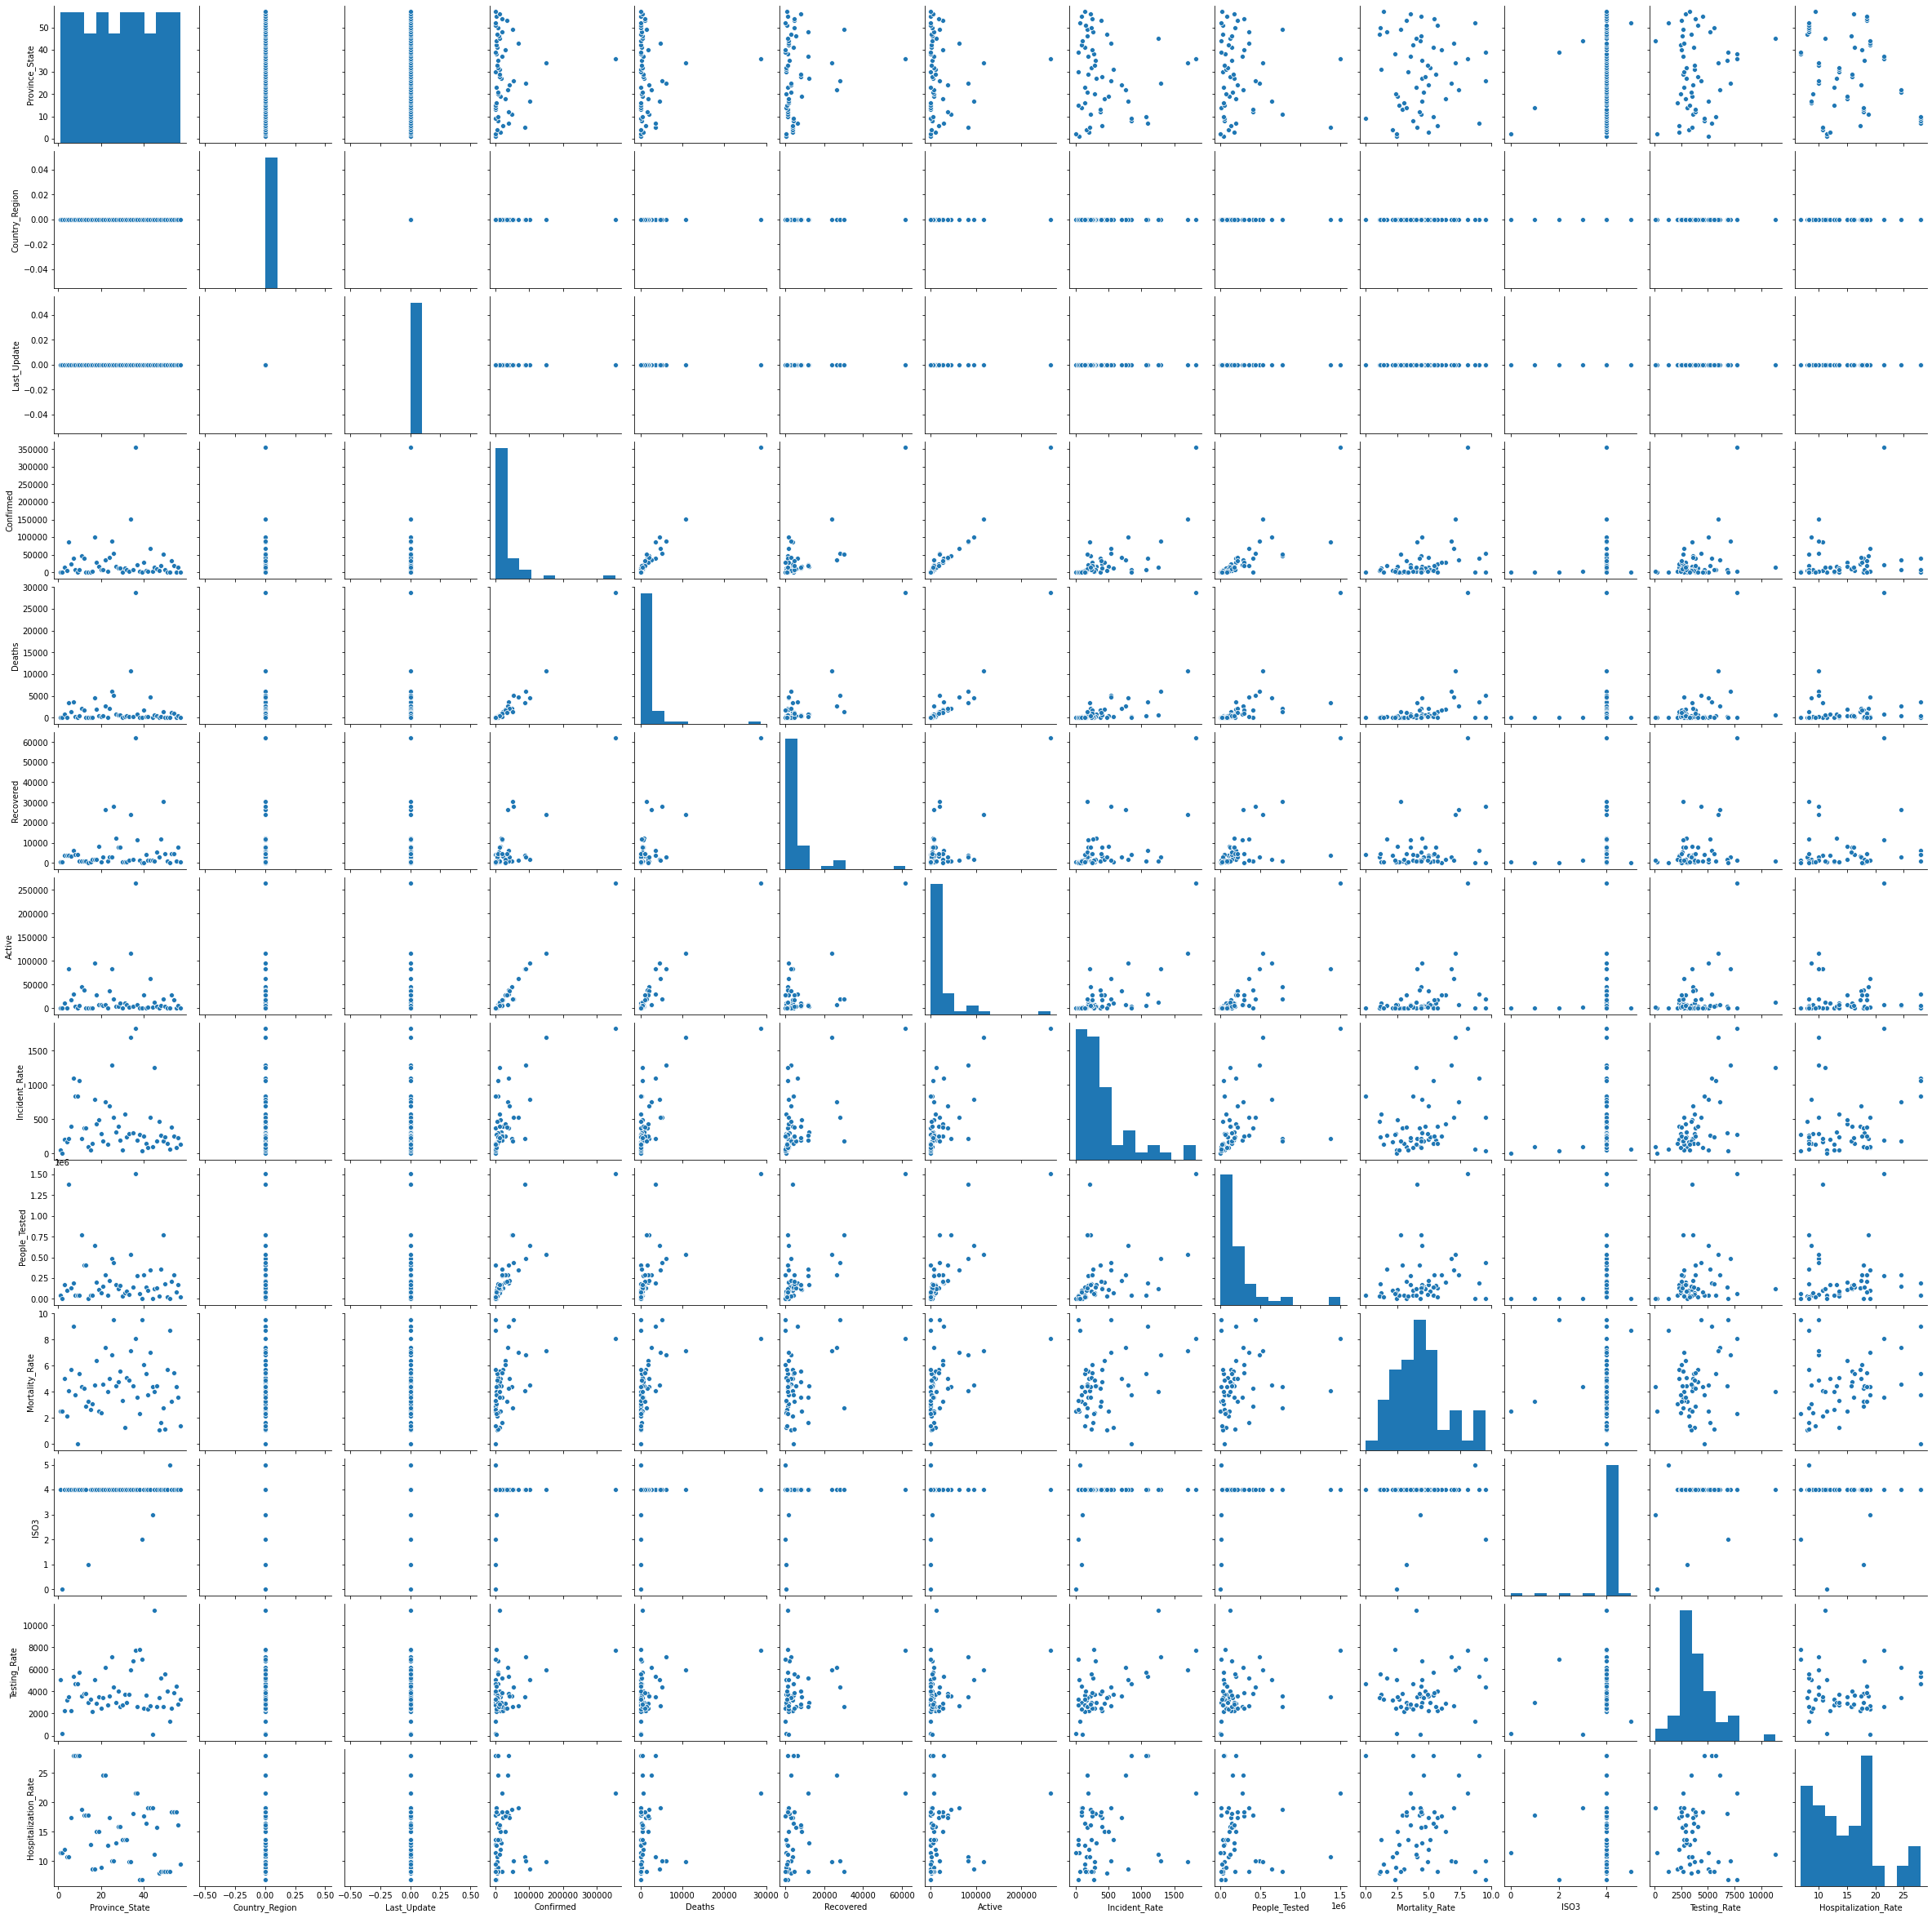

In [21]:
sns.pairplot(df)

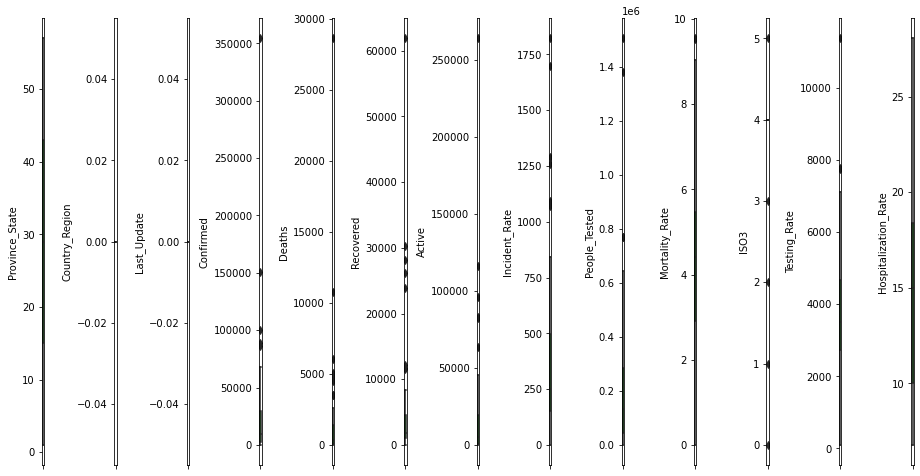

In [22]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [23]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(57, 13)

In [24]:
threshold=3
print(np.where(z>3))

(array([ 1,  4, 13, 33, 35, 35, 35, 35, 35, 35, 44], dtype=int64), array([10,  8, 10,  7,  3,  4,  5,  6,  7,  8, 11], dtype=int64))


In [25]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(57, 13)
(0, 13)


In [26]:
df.skew()

Province_State          0.000000
Country_Region          0.000000
Last_Update             0.000000
Confirmed               4.664783
Deaths                  5.440545
Recovered               3.677733
Active                  4.140653
Incident_Rate           1.865560
People_Tested           2.745092
Mortality_Rate          0.506061
ISO3                   -4.086451
Testing_Rate            1.267120
Hospitalization_Rate    0.663127
dtype: float64

In [27]:
#log transformation
df['Deaths'] = np.log(1+df['Deaths'])

In [28]:
x=df.drop(columns=['Deaths','Country_Region'],axis=1)
y=df['Deaths']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [30]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs well")
        print("At random state:-",i)
        print("Training r2 score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is:-", r2_score(y_test,pred_test)*100)

In [31]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()

In [32]:
print(r2score*100)

89.03656374668094


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred = model.predict(x)
    
    #perform cross-validation
    cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('model report')
    print('MSE:', mean_squared_error(y, pred))
    print('CV score:', cv_score)

model report
MSE: 1.9226753296903458
CV score: 7.1438180065454615


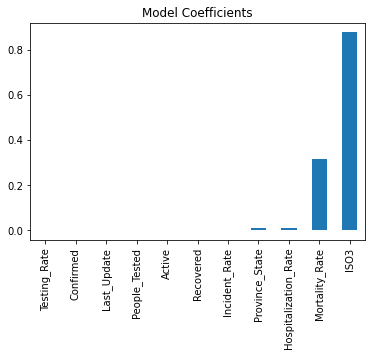

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE: 2.4089309978651734
CV score: 3.7827706714455287


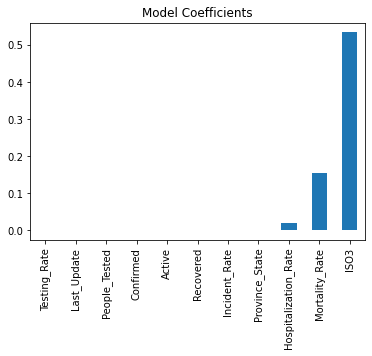

In [35]:
model = Ridge(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE: 0.0
CV score: 0.6506882410812489


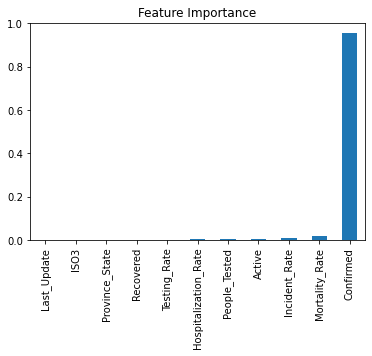

In [36]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

In [37]:
import joblib
joblib.dump(RF,"Project9_covid19.pkl")

['Project9_covid19.pkl']

In [38]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1.386294,6.234474
1,4.007333,6.058029
2,4.304065,5.205998
3,6.011267,6.529152
4,1.945910,9.675961
5,8.470311,8.369174
6,5.648974,4.469758
7,6.177944,5.987707
8,2.484907,4.391542
9,2.833213,4.711810
